In [22]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import Pipeline

In [23]:
df = pd.read_csv("person_data.csv")
df.columns

Index(['Age', 'Height', 'Weight'], dtype='object')

In [24]:
feature_ = df[['Age', 'Height']]
target_ = df['Weight']

<AxesSubplot:xlabel='Age', ylabel='Height'>

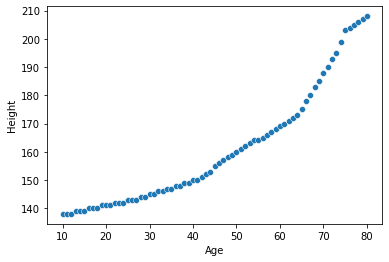

In [48]:
sns.scatterplot(x ='Age', y ='Height', data = df)

In [49]:
StdSC = StandardScaler()
pca = PCA(n_components=1)
poly_feature = PolynomialFeatures(degree= 4)
rgr = LinearRegression()

In [52]:
pca.fit_transform(StdSC.fit_transform(feature_))
pca.explained_variance_ratio_ *100

array([97.36416205])

In [50]:
poly_model = Pipeline  ([ ('Standar scaler', StdSC), 
                         ('PCA', pca), 
                         ('Poly transform', poly_feature), 
                         ('Regression', rgr) 
                        ])

In [44]:
poly_model.fit(feature_, target_)
pred_ = poly_model.predict(feature_)
RSq = r2_score(target_,pred_)
RMSE = np.sqrt(mean_squared_error(target_,pred_))
print (RSq,RMSE)

0.9017224665462797 5.526039114479491


<function matplotlib.pyplot.show(close=None, block=None)>

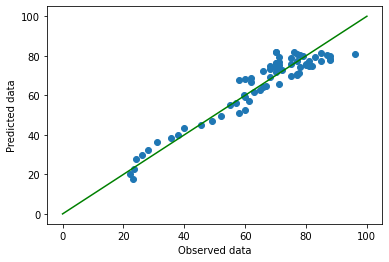

In [47]:
plt.scatter(target_,pred_)
plt.plot([0,100],[0,100],'g')
plt.xlabel('Observed data')
plt.ylabel('Predicted data')
plt.show